Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (click the restart button in the tool bar or select Kernel$\rightarrow$Restart in the menu bar) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

**Make sure you delete `raise NotImplementedError()`** (if existing) and fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [107]:
NAME = "Stephen Shell"

**Don't modify the formal TEST cells!**

---

### 1d analysis with `pandas`

The emphasis in this assignment is reading data in with `pandas` and doing some typical analysis. Each problem also requires a plot and as such the plot should be clean and clear.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nose.tools import assert_equal

%matplotlib inline

## Explore college station weather data

### Load in the data

Load in the file '1514494.csv' (contains climatic data for COLLEGE STATION EASTERWOOD FIELD) into a `pandas` dataframe, indexed by date (the `DATE` column), called `df`.

---

Grading rubric [5 points]:

* [5 pts] Read in data using `pandas` in a reasonable way. Note that the index column needs to be in the Date format (not normal string)

In [109]:
file = '1514494.csv'

df = pd.read_csv(file, parse_dates=['DATE'], index_col=['DATE'])
#print(df.head())

# raise NotImplementedError()

In [110]:
assert_equal(len(df), 24552)
assert_equal(df.index.dtype, np.dtype('<M8[ns]'))
print('Success!')

Success!


### Monthly averages (groupby)

Create a plot of **monthly averaged** max (column `TMAX`) and min (columns `TMIN`) temperature. "monthly averaged" means each January in the record will be included in the 'Jan' average, and so on for each month, so that there are twelve values in the final result.

Label the months with 'Jan', 'Feb', 'Mar' and so on, instead of numbers. To label like this, refer to the Matplotlib Basics Jupiter notebook (`ax.set_xticks` and `ax.set_xticklabels`). Make sure you have a legend that identifies each line,  a label on the y-axis that states the quantity and units, and a title that explans the calculation.

-----------

Grading rubric [5 points]:

* [2 pts] Calculate averages correctly
* [1 pt] Data in plot is correct
* [2 pts] Plot is formatted and labeled correctly


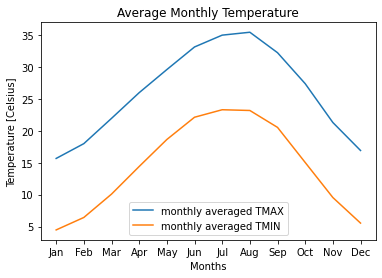

In [111]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_max = df.groupby(df.index.month)['TMAX'].mean()
monthly_min = df.groupby(df.index.month)['TMIN'].mean()

fig, ax = plt.subplots()

ax.plot(monthly_max, label='monthly averaged TMAX')
ax.plot(monthly_min, label='monthly averaged TMIN')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)

plt.xlabel('Months')
plt.ylabel('Temperature [Celsius]')
plt.title('Average Monthly Temperature')
plt.legend()
plt.show()
plt.close()

# raise NotImplementedError()

### yearly-averaged temperature timeseries (resampling)

Create a plot of timeseries of max and min temperature *anomalies* (aka, the difference between the [daily max value] and the [average max through the whole time (not a single year)], and the difference between the [daily min value] and the [average min through the whole time]). Then, use the resampling method to calculate the average of the max temperature anomalies and min temperature anomalies for each year.

Make sure you have a legend that identifies each line, and a label on the y-axis that states the quantity and units.

---


Below is what I made for your reference.

<img src="year-average.png" width=800 />


Grading rubric [5 points]:

* [2 pts] Calculate anomalies correctly
* [1 pt] Data in plot is correct
* [2 pts] Plot is formatted and labeled correctly


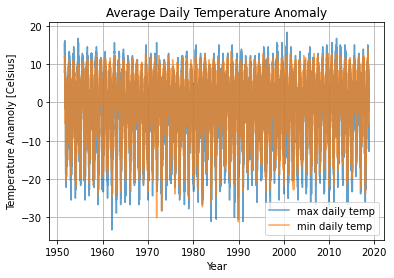

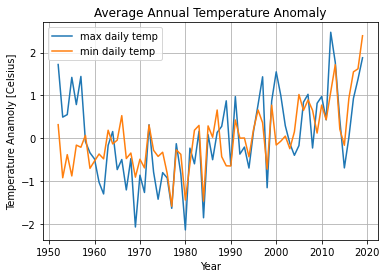

In [112]:
avg_max = df['TMAX'].mean()
avg_min = df['TMIN'].mean()

max_anomalies = df['TMAX'] - avg_max
min_anomalies = df['TMIN'] - avg_min

fig, ax = plt.subplots()

ax.plot(max_anomalies, label='max daily temp', alpha=0.7)
ax.plot(min_anomalies, label='min daily temp', alpha=0.7)
ax.grid()

plt.xlabel('Year')
plt.ylabel('Temperature Anamoly [Celsius]')
plt.title('Average Daily Temperature Anomaly')
plt.legend()
plt.show()
plt.close()

#resample
max_annual = max_anomalies.resample('A').mean()
min_annual = min_anomalies.resample('A').mean()

fig, ax = plt.subplots()

ax.plot(max_annual, label='max daily temp')
ax.plot(min_annual, label='min daily temp')
ax.grid()

plt.xlabel('Year')
plt.ylabel('Temperature Anamoly [Celsius]')
plt.title('Average Annual Temperature Anomaly')
plt.legend()
plt.show()
plt.close()

# raise NotImplementedError()

### Decadal averages

Make a similar plot as in the last section, but resample over a decade instead of a year.

---

Grading rubric [5 points]:

* [2 pts] Calculate anomalies correctly
* [1 pt] Data in plot is correct
* [2 pts] Plot is formatted and labeled correctly

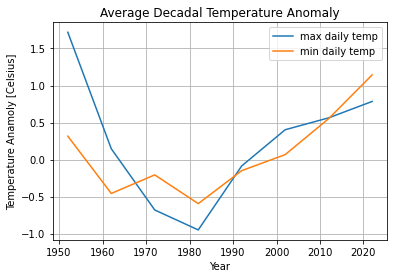

In [113]:
max_decadal = max_anomalies.resample('10A').mean()
min_decadal = min_anomalies.resample('10A').mean()

fig, ax = plt.subplots()

ax.plot(max_decadal, label='max daily temp')
ax.plot(min_decadal, label='min daily temp')
ax.grid()

plt.xlabel('Year')
plt.ylabel('Temperature Anamoly [Celsius]')
plt.title('Average Decadal Temperature Anomaly')
plt.legend()
plt.show()
plt.close()

# raise NotImplementedError()

# Grad student problems below

---


## pCO$_2$ vs. temperature

#### A. Rolling mean
Use pandas to read in temperature data ("647_Global_Temperature_Data_File.txt") from Mauna Loa, Hawaii.
You should choose keyword arguments carefully to be able to use time as your index, have proper column names, and have the data parsed properly. You may need to use the `delim_whitespace=True` input keyword argument to have it read in properly.

The data have three columns: the first is the year (Year), the second is the average global temperature in time (No_Smoothing), and the third is a 5-year running mean of the global average temperature (Lowess(s)). A rolling or running mean calculates the average from some number of neighboring data points for each point in the time series.

You might need to rename your columns with sensible names. You can rename your columns using: `df.columns = [newname1, newname2, ...]` 

Reproduce the rolling mean using `pandas` by calculating a 5 year rolling mean of your own from the time series of average global temperature (use the `.rolling` method). Try different keyword arguments for the rolling mean calculation until it closely matches the one (Lowess(s)) from the data file with no major shifts in time, and show them in a plot that overlays the two together but makes them both visible. Include the original data in this plot for comparison.

---

Grading rubric [7 points]:

* [2 pts] Read in data using `pandas` in a reasonable way.
* [2 pts] Calculate rolling mean correctly; it should closely match the calculation from the file
* [3 pts] Plot 3 lines: the original time series of average global temperature, the 5-year running mean of the global average temperature from the data file, and your calculation of the 5-year running mean of the global average temperature. Your plot should be well-labeled and laid out.


In [114]:
# Part A

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

#### B. Resampling

Read in the dataset (`co2_mm_mlo.txt`) of carbon dioxide measurements from Mauna Loa, Hawaii, to go with the temperature data from Part A of this question. You can use the following line as the start of this call – you fill in the input keyword arguments (you may need to use the `delim_whitespace=True` input keyword argument for the datasets to have it read in properly):

> pd.read_table('co2_mm_mlo.txt', ...)

Plot the CO$_2$ (use the **de-seasonalized** CO$_2$) and temperature measurements on the same plot, 1 to 1. That is, make a `scatter` plot of CO$_2$ vs. temperature with CO$_2$ on the x-axis as the independent variable, and temperature plotted against it on the y-axis. **Note that the temperature in this plot should be “Annual_Mean”, not the "5-year_Mean” or the “rolling_mean”**. The problem is that the CO$_2$ data is given monthly but the temperature data is given annually, and to make the plot you need to have the same number of data points at the same times. Downsample the monthly CO$_2$ data to match the timing of the annual temperature data.

Plot the data together for **the range of times that are included in both datasets**. On your `scatter` plot, color the markers with time to show how time is passing in relationship to the data. Try to figure out a good way to represent time so that the colorbar labels are meaningful to the viewer. Since you are probably going to end up plotting two different dataframes together, you probably want to use `matplotlib` directly to make this plot, instead of trying to use `pandas` built-in plotting.

---

Grading rubric [7 points]:

* [2 pts] Read in data using `pandas` in a reasonable way. Note that when you parse dates, you should parse both the year and the month and read them into a single column.

* [2 pts] Resample and fill-in data properly

* [3 pts] Make scatter plot, colored with time, for the correct time range. Label nicely and clearly.


In [ ]:
# Part B

# YOUR CODE HERE
raise NotImplementedError()